### 3.1 Why EDA Matters in Campaign Analytics

#### Goal:
Before we start building predictive models or testing algorithms, we need to understand the data. **Exploratory Data Analysis (EDA)** is the first real step in any campaign analytics project, helping us uncover patterns, diagnose problems, and explore relationships between variables.

#### Why You Should Never Skip This Step:
1. **It helps us understand the data**: 
   Marketing datasets often have many types of information such as age, job, contact method, campaign history, and economic indicators. EDA helps us understand how these variables behave and how they influence the campaign. For example, we might discover that younger customers respond less than older ones, or that certain contact methods lead to better responses.

2. **It shows us what matters**: 
   EDA helps us identify key variables that really influence campaign outcomes. For example, we might see that contacting a customer more than three times negatively affects the success of the campaign, or that prior contact history is crucial for new subscriptions. These insights directly influence future campaign strategies.

3. **It diagnoses problems early**: 
   Data is rarely perfect. EDA helps identify issues like missing values, inconsistent data, or outliers (e.g., a client contacted 40 times or a customer's age recorded as 150). Catching these issues early can save time and resources when preparing the data for modeling.

#### Practical Example:
Let’s apply EDA to our **bank marketing case**:
- **Exploration Goals**: 
  1. How are subscription rates distributed across different age groups, jobs, and education levels?
  2. Does the contact method (cellular vs. telephone) affect conversion rates?
  3. Are there seasonal effects, such as higher conversion rates in specific months?
  4. How do economic conditions impact customer behavior?

By analyzing these, we can gain actionable insights. For instance, if we find that conversions spike in April and May, the marketing team could plan campaigns accordingly. If contacting a customer more than three times leads to a drop in conversion rates, resources can be better allocated.

In [1]:
import pandas as pd

# Load the dataset (replace this with your dataset path)
df = pd.read_csv("bank-additional-full.csv", sep=";")

# Inspect the dataset structure
print(f"Dataset Info: {df.info()}")
print(f"First 5 rows of the dataset: {df.head()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

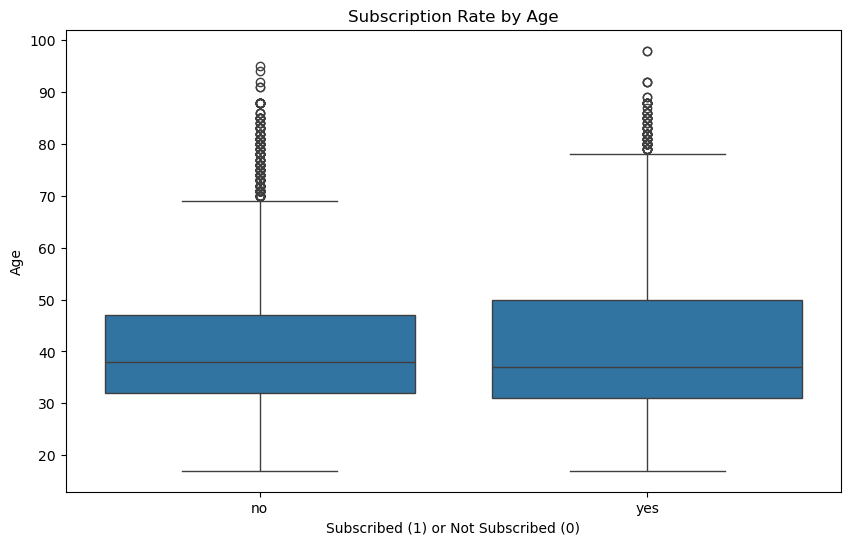

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Subscription Rate by Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='age', data=df)
plt.title('Subscription Rate by Age')
plt.xlabel('Subscribed (1) or Not Subscribed (0)')
plt.ylabel('Age')
plt.show()

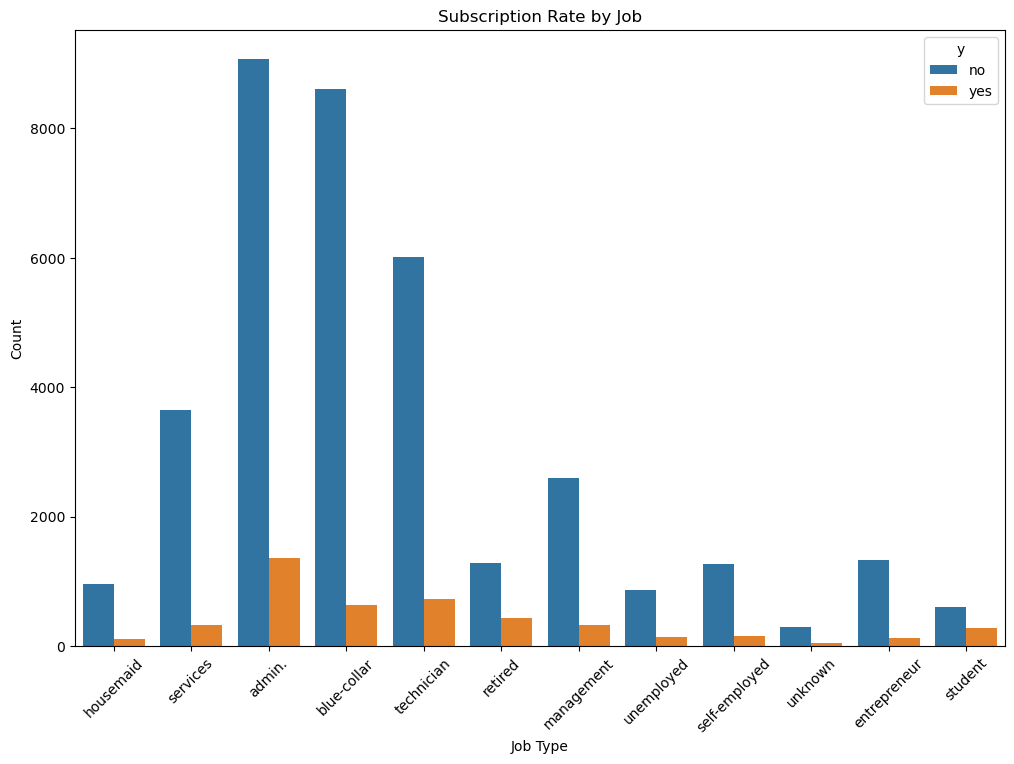

In [3]:
# Plotting Subscription Rate by Job
plt.figure(figsize=(12, 8))
sns.countplot(x='job', hue='y', data=df)
plt.title('Subscription Rate by Job')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

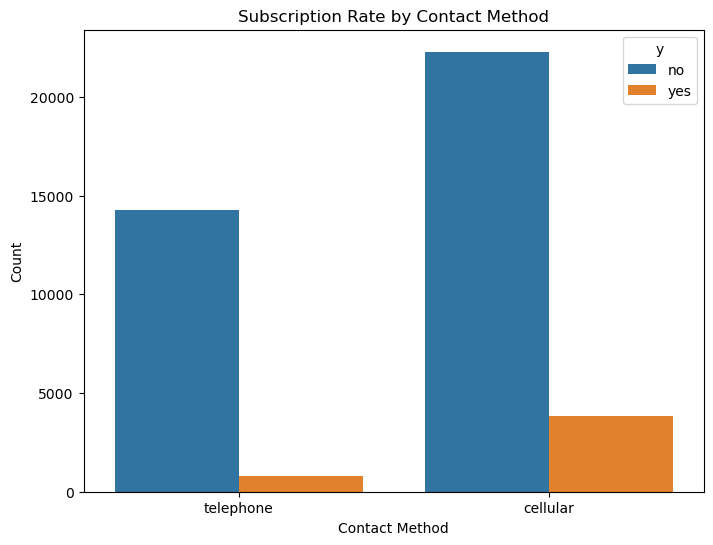

In [4]:
# Plotting Subscription Rate by Contact Method
plt.figure(figsize=(8, 6))
sns.countplot(x='contact', hue='y', data=df)
plt.title('Subscription Rate by Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.show()

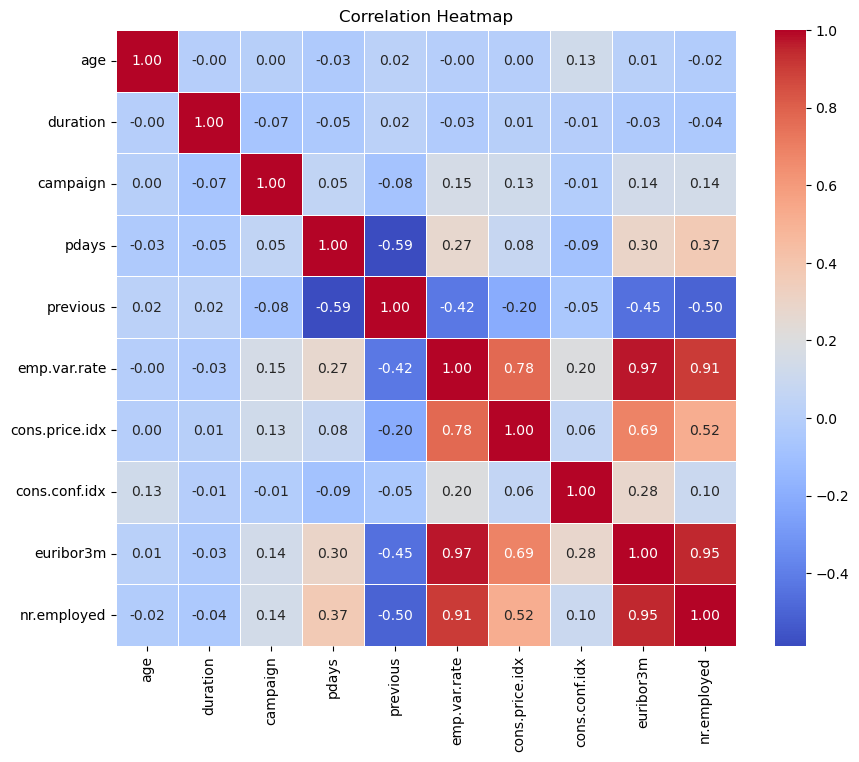

In [6]:
# First, identify and handle non-numeric columns
# Drop non-numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix on numeric columns only
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(f"Missing Values:\n{missing_values}")

Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
# Identifying and handling outliers for Age
age_outliers = df[df['age'] > 100]  # Let's assume ages above 100 are outliers
print(f"Outliers in Age:\n{age_outliers}")
# Optionally, drop outliers or apply transformations
df = df[df['age'] <= 100]

Outliers in Age:
Empty DataFrame
Columns: [age, job, marital, education, default, housing, loan, contact, month, day_of_week, duration, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, y]
Index: []

[0 rows x 21 columns]


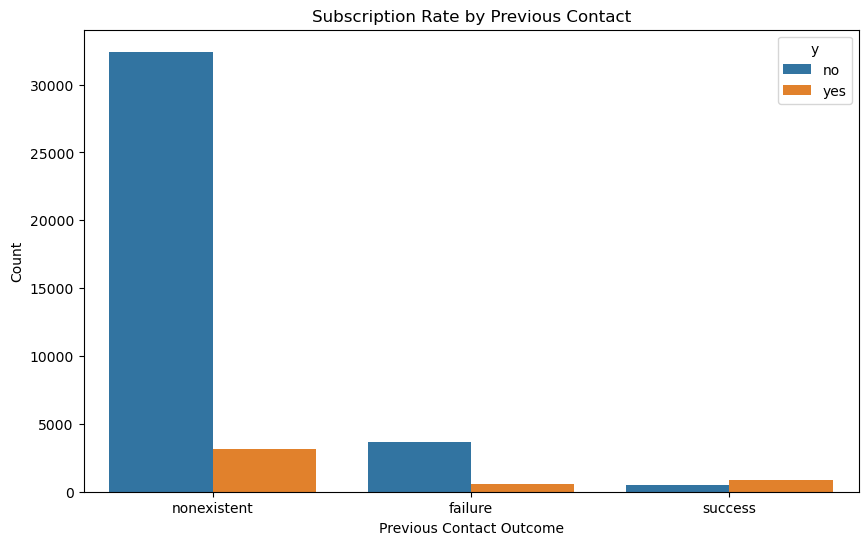

In [11]:
# Relationship between previous contact and subscription
plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', hue='y', data=df)
plt.title('Subscription Rate by Previous Contact')
plt.xlabel('Previous Contact Outcome')
plt.ylabel('Count')
plt.show()